In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

- Description


The Indian Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [2]:
# intake of dataset
df = pd.read_csv('database_IND.csv')
df.sample(n=10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
794,IND,India,TAWA,IND0000446,13.5,22.5616,77.9635,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,IND,India,BHIRA TAIL RACE,IND0000056,80.0,18.4426,73.3498,Hydro,NaN,NaN,...,2019.0,NaN,90.79375,73.50065,101.07210,96.66425,94.09715,NaN,Central Electricity Authority,NaN
144,IND,India,CHANJU-I,IND0000515,36.0,32.7369,76.2477,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,79.02290,136.76275,NaN,Central Electricity Authority,NaN
760,IND,India,Shivasamundra Solar Power Plant,WRI1026207,5.0,12.3003,77.1638,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,IND,India,Shirsoli Solar Power Plant,WRI1026206,8.5,17.4999,75.7810,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,IND,India,PARSEN_S VALLE,IND0000329,30.0,11.3646,76.6045,Hydro,NaN,NaN,...,2019.0,NaN,34.65585,25.50185,23.83025,26.97445,45.71030,NaN,Central Electricity Authority,NaN
743,IND,India,SURATGARH,IND0000431,1500.0,29.1790,74.0202,Coal,Oil,NaN,...,2019.0,NaN,9155.18000,5282.00000,4030.81800,4453.20300,6476.69600,NaN,Central Electricity Authority,NaN
280,IND,India,INDRA GANDHI STPP,IND0000154,1500.0,28.4849,76.3754,Coal,Oil,NaN,...,2019.0,NaN,6587.52700,5418.76700,5109.49700,7290.56800,6966.60400,NaN,Central Electricity Authority,NaN
822,IND,India,TUTICORIN- IND BARATH,IND0000467,300.0,8.7635,78.1753,Coal,Oil,NaN,...,2019.0,NaN,1262.60000,728.36400,21.73040,0.00000,0.00000,NaN,Central Electricity Authority,NaN
410,IND,India,Komal West Solar Power Plant,WRI1026165,1.0,11.0118,79.5898,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


as we can see in the dataset is containing 27 columns where data contains of categorical, numerical and some nan value.

we have to predict 2 attribute primary_fuel and capacity_mw.

there is plenty of missing values, i can judge that there is a column entirely consists of NaN.

Missing values will definately hamper our accuracy so i have to carefull to drop columns or replace.




# Exploratory Data Analysis

checking the unique entries in columns in dataframe

In [3]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

with one unique entry is not of any help, we will check further and drop the column

columns such as country, country_long, other_fuel, wepp_id, estimated_generation_gwh, etc are not of our any use

In [5]:
df['estimated_generation_gwh'].unique()

array([nan])

In [6]:
df['generation_gwh_2019'].unique()

array([nan])

In [7]:
df['generation_gwh_2013'].unique()

array([nan])

In [8]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [9]:
df['generation_gwh_2013'].unique()

array([nan])

In [10]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [3]:
#DROPPED SOME COLUMNS
df.drop(['country','country_long','estimated_generation_gwh','wepp_id','other_fuel1','owner','other_fuel2',
         'other_fuel3','name','url','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [4]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [14]:
df.isna().sum()

country                     0
country_long                0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [15]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [5]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [10]:
#dropping year_of_capacity_data since it depicts only one year that is 2019
df.drop(['year_of_capacity_data'],axis=1,inplace=True) 

In [6]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [13]:
df.isna().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

So,  what we noticed here is 
- we removed mutiple columns because either they got many missing values or all the values are unique which will not be any use
- latitude and longitude both got same amount of nans.
- commissioning_year got years from 1927 to 2015 and other 380 nan
- source column got all values filled with object types, we will decide later that whether we have delete it or not.
- generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 got many nans we have to fill those with medians.


# Univariate Analysis

first of all we will store all the continuous and numerical data in a varibale

In [26]:
num_data=df[['capacity_mw','latitude','longitude','generation_gwh_2014',
                    'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

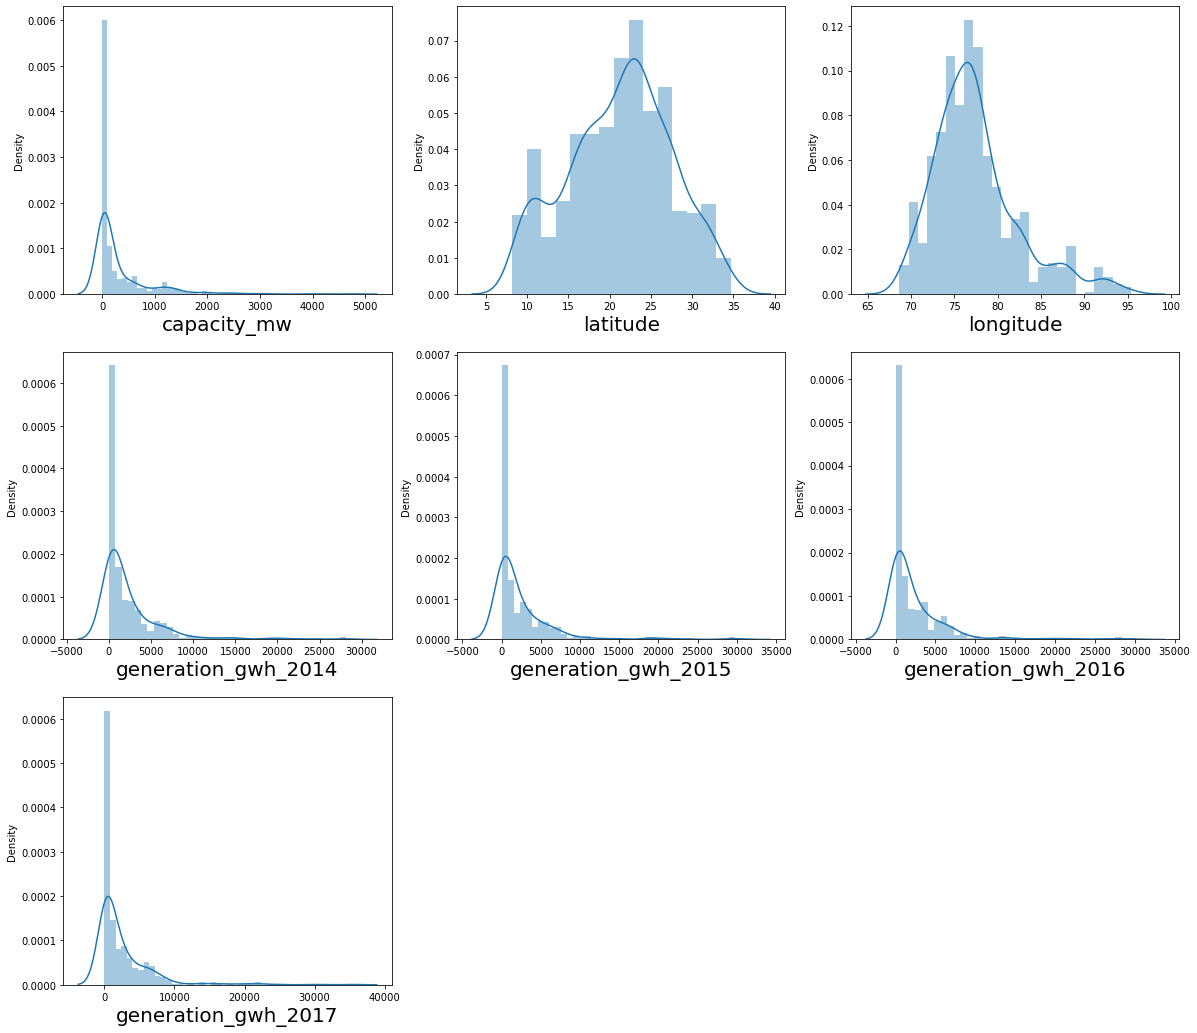

In [27]:
plt.figure(figsize=(20,18))
plotnumber=1ge
for column in num_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(num_data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show();

- we can see capacity_mw is right skewed as the minimum value is 0 and maximum value is 4760. The gap is huge
- latitude column is normally distributed
- logitude is almost normally distributed but there is a little skewed to the right
- maximum values in generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are nan or near zero so... is so skewed to the right

Text(0.5, 1.0, 'Countplot of Primary Fuel')

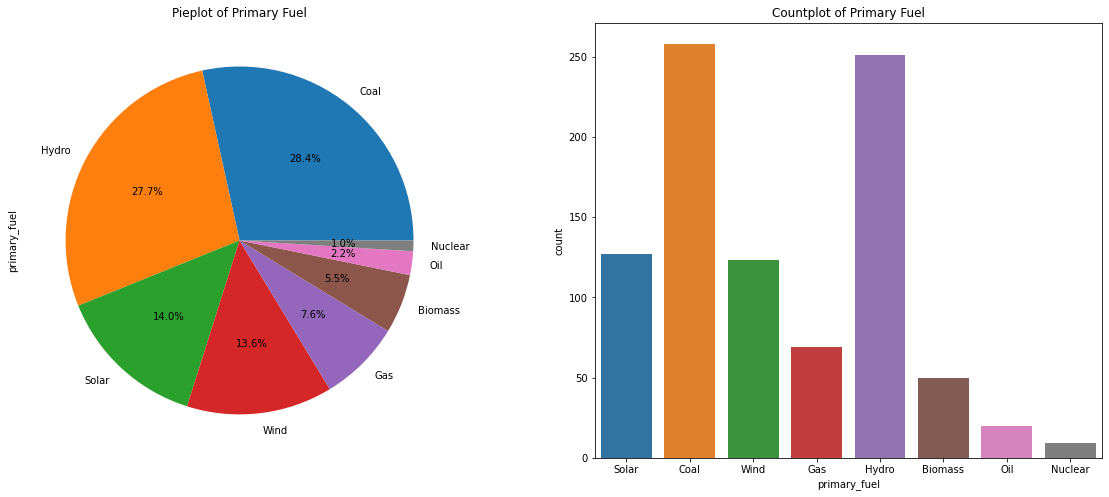

In [38]:
#visualizing the primary fuel

plt.figure(figsize=(20,8))
plt.subplot(1,2,1).title
df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f"Pieplot of Primary Fuel")
plt.subplot(1,2,2)
sns.countplot(df['primary_fuel'])
plt.title(f"Countplot of Primary Fuel")

primary_fuel got 8 categories, those are solar, Coal, Wind, Gas, Hydro, Biomass, Oil and Nuclear where coal(28.5%) as highest and nuclear as the lowest. we need to covert it into binary class for prediction.

Text(0.5, 1.0, 'countplot of geolocation source')

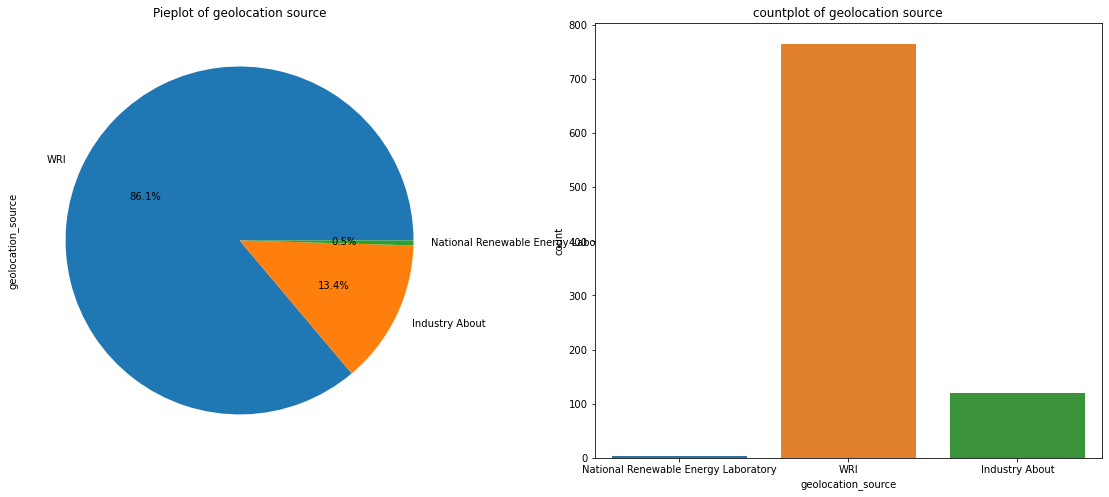

In [43]:
#Pieplot and countplot on geolocation_source
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f"Pieplot of geolocation source")
plt.subplot(1,2,2)
sns.countplot(df['geolocation_source'])
plt.title(f"countplot of geolocation source")

maximum geolocation is from ERI source and the minimum which is National Renewable Energy lab. with is less that 1%

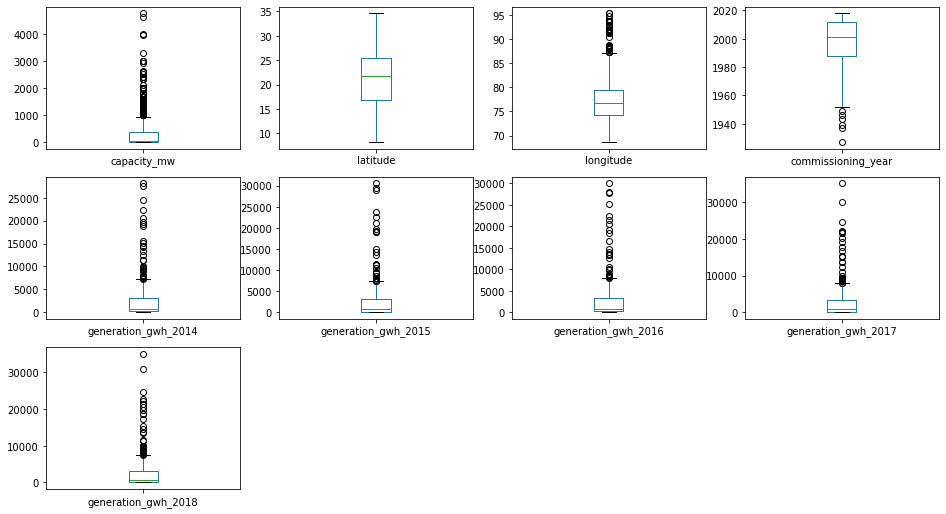

In [44]:
#outliner detection
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12));

Except latitude column all the continuous columns are having outliers

In [45]:
#divide the target column
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

# Bivariate Analysis

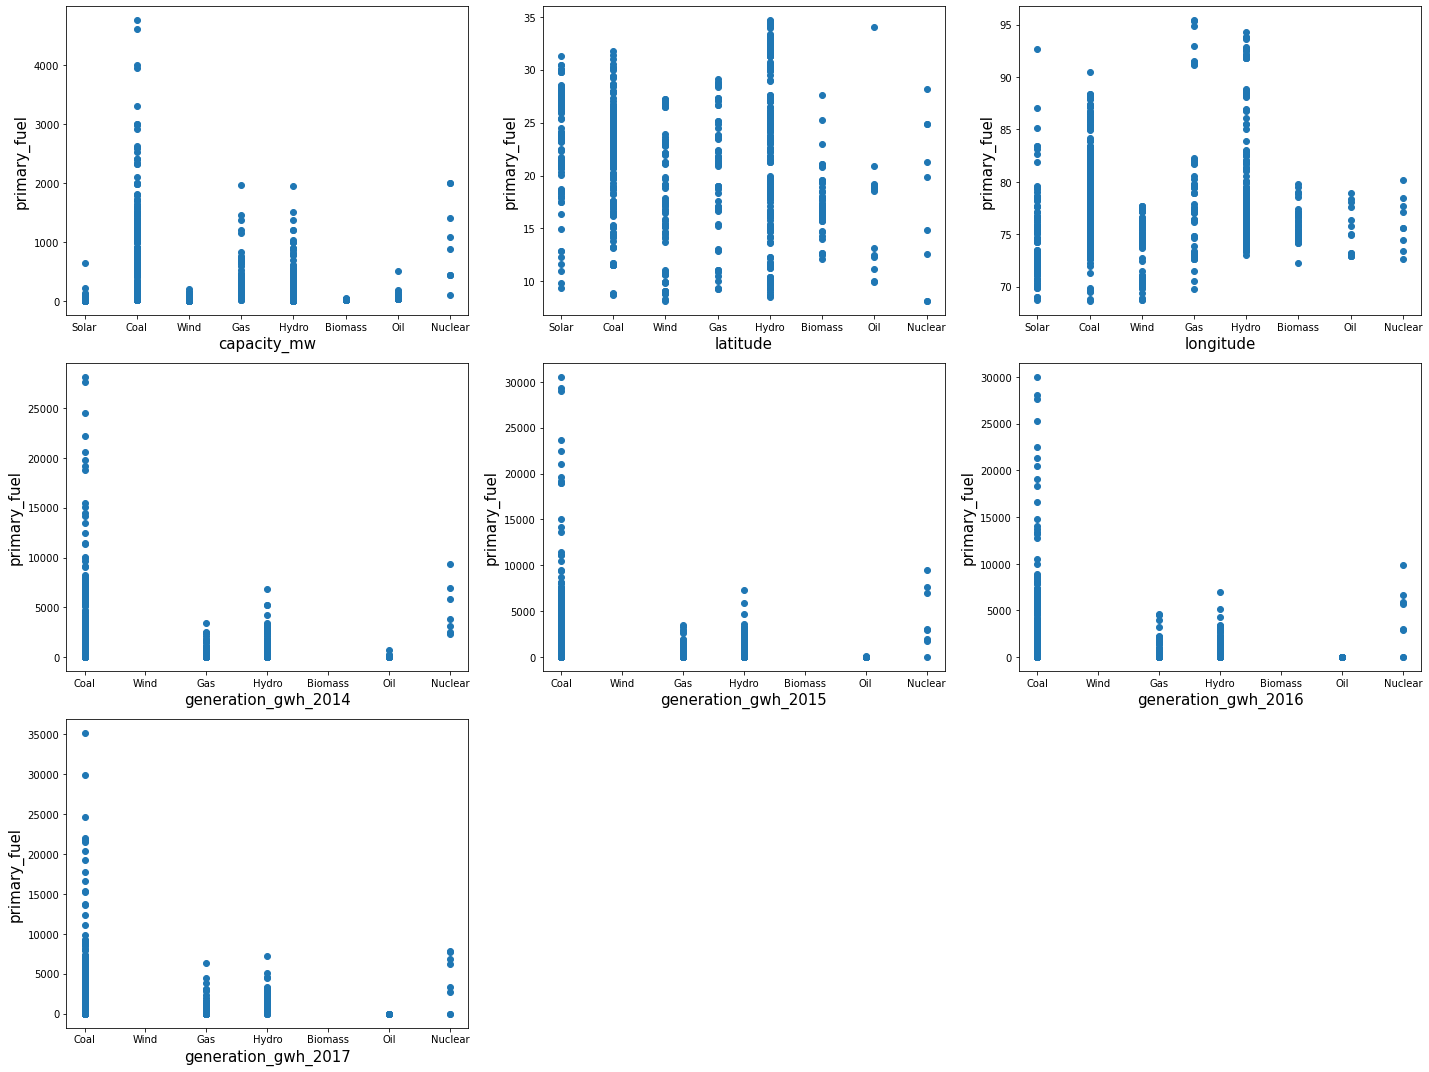

In [49]:
#Checking the relation between Primary fuel with continuous features first.
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_data:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(Y,num_data[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.tight_layout();

As we can see coal has the highest numbers of primary fuel

From 2013 to 2017 electricity is generated highest by coal power plants and 2nd highest is by Hydro power plants.

In [55]:
#dividing the dataset into label (capacity_mw )and features to analyze the relations.
y = df['capacity_mw']
x = df.drop(columns=['capacity_mw'])


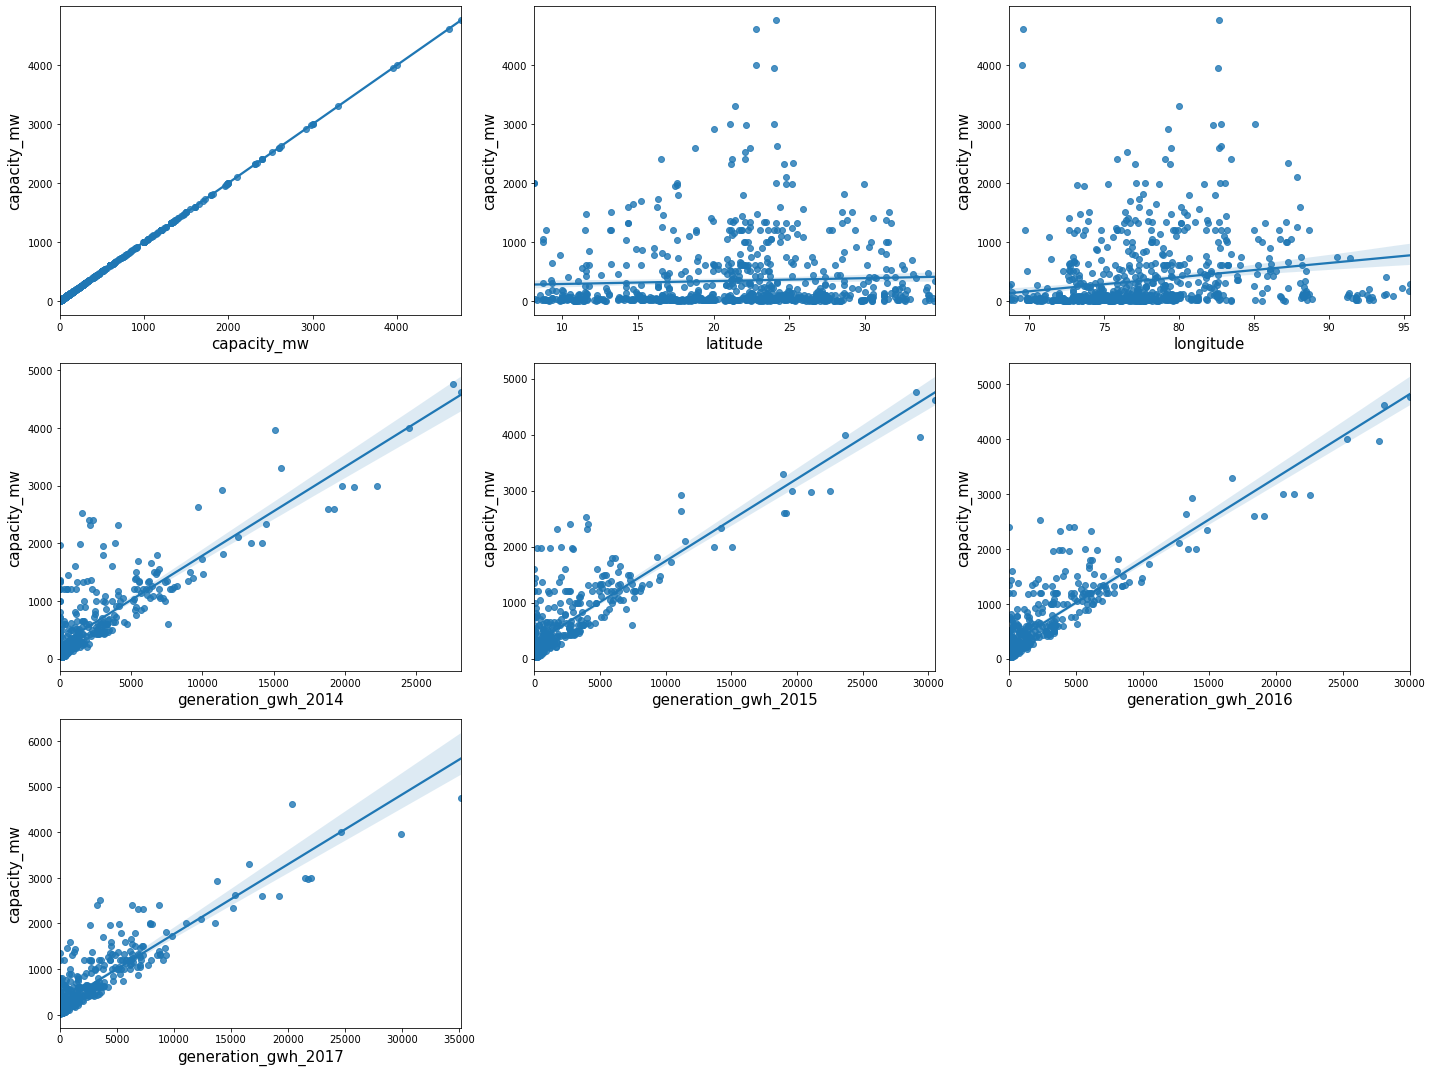

In [62]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_data:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(num_data[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
plt.tight_layout();

there is not much relation between capacity_mw with latitude and longitude. Other than that from 2013 to 2017 the generation of electricity is somewhat linearly correlated with capacity_mw.

# Multivariate Analysis

In [63]:
corr = df.corr()
corr

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


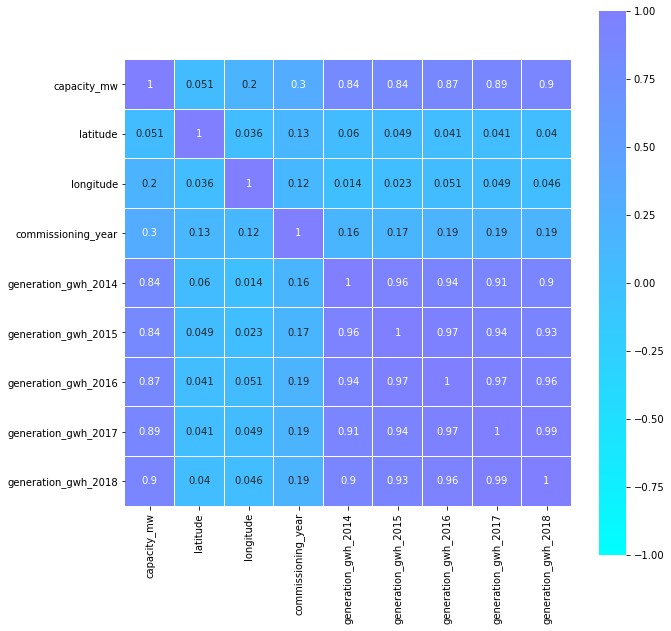

In [93]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap='cool',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show();

As we can see, all the generation_gwh is correlated with capacity_mw and that will be good for our regression model.

Least correlation between features important for Classification problem.

there maybe correlation between generation gwh but we will not drop those, as those are correlated with the independent variable capasity_mw.

In [66]:
#data cleaning

replacing all the missing values with the median of the rest of the available value except the latitude, since it is normally distributed so the nan in latitude will be mean of the rest of available value.

In [67]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)   
df['longitude'].fillna(df['longitude'].median(),inplace=True)

df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median(),inplace=True)

df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [68]:
#checkig is there any missing value present or not.
df.isna().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source          0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

we can't replace the nan of a with mean years or median years, since that will violate the law of nature, so we will drop that column

In [69]:
df=df.drop(columns=['commissioning_year'],axis=1)

In [72]:
df.isna().sum()

gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

lets encode using encoder

In [73]:
#Now let's encode the nominal and categorical data into numerical data for using in model. For that we are using ordinal encoder.

en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()


,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,657.0,2.5,28.1839,73.2407,6.0,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375,0.0
1,519.0,98.0,24.7663,74.6090,1.0,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375,0.0
2,853.0,39.2,21.9038,69.3732,7.0,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375,0.0
3,0.0,135.0,23.8712,91.3602,2.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1.0,1800.0,21.9603,82.4091,1.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0


In [74]:
df['generation_data_source'].unique()

array([0.])

In [75]:
#dropping generation_data_source since it has 0.0 value only
df=df.drop(columns='generation_data_source',axis=1)

# Skewness

In [76]:
df.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [78]:
df=df.drop(columns='gppd_idnr',axis=1)

In [81]:
#removing the skewness using power transformation
f_label=['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [82]:
from sklearn.preprocessing import PowerTransformer
sclr=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method
df[f_label]=sclr.fit_transform(df[f_label].values) #scaling the the column

In [83]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              0.002675
primary_fuel           0.472251
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    0.285906
generation_gwh_2015    0.222151
generation_gwh_2016    0.204011
generation_gwh_2017    0.196816
generation_gwh_2018    5.133226
dtype: float64

Now this dataset is ready for Classification and regression. We will use this dataset in our regression problem. But as we need to show the ROC AUC curve we need to convert the multiclass target variable primary fuel into binary class. and that we will use only in classification problem. Let's do that. We are combining the 8 categories into two categories fuel1 and fuel2. fuel1 is having primary fuels those produde more like hydro, coal, solar and wind whereas fuel2 is having fuel those produce less like gas, biomass, oil, nuclear.

In [84]:
bins=(0, 4, 8)
group_names=['fuel1', 'fuel2']
df['primary_fuel']=pd.cut(df['primary_fuel'], bins=bins, labels =group_names)

In [85]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l_s = ['primary_fuel']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [86]:
#let's distribute it
y=df['primary_fuel']
x=df.drop(columns=['primary_fuel'])

In [87]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [88]:
y.value_counts()

0    587
1    587
2    587
Name: primary_fuel, dtype: int64

In [89]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [90]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

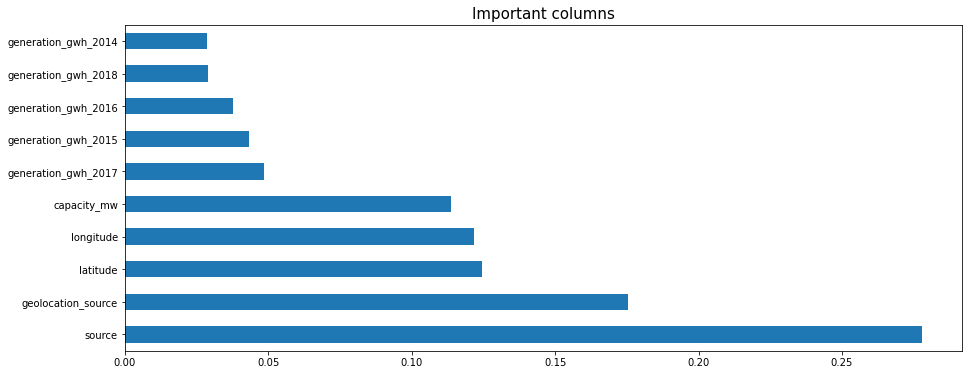

In [92]:
plt.figure(figsize=(15,6))
plt.title('Important columns',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

# Model building

In [116]:
def classify(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [101]:
# Logistic Regression

model=LogisticRegression()
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       149
           1       0.65      0.71      0.68       148
           2       0.72      0.75      0.74       144

    accuracy                           0.76       441
   macro avg       0.76      0.75      0.76       441
weighted avg       0.77      0.76      0.76       441

Accuracy Score: 75.51020408163265
Cross Validation Score: 75.07049961370076

Accuracy Score - Cross Validation Score is 0.43970446793188955


In [105]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       149
           1       0.94      0.82      0.87       148
           2       0.99      0.97      0.98       144

    accuracy                           0.91       441
   macro avg       0.92      0.91      0.91       441
weighted avg       0.92      0.91      0.91       441

Accuracy Score: 91.38321995464852
Cross Validation Score: 89.89248004120525

Accuracy Score - Cross Validation Score is 1.490739913443278


In [106]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       149
           1       0.97      0.98      0.97       148
           2       0.97      0.99      0.98       144

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.98      0.98      0.98       441

Accuracy Score: 97.50566893424036
Cross Validation Score: 96.42206412567602

Accuracy Score - Cross Validation Score is 1.0836048085643455


In [108]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       149
           1       0.97      0.99      0.98       148
           2       0.96      0.99      0.97       144

    accuracy                           0.97       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.97      0.97      0.97       441

Accuracy Score: 96.82539682539682
Cross Validation Score: 96.93439351017254

Accuracy Score - Cross Validation Score is -0.10899668477571822


In [110]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       149
           1       0.85      0.90      0.87       148
           2       0.87      0.99      0.93       144

    accuracy                           0.89       441
   macro avg       0.90      0.89      0.89       441
weighted avg       0.90      0.89      0.89       441

Accuracy Score: 89.34240362811792
Cross Validation Score: 87.33662760751996

Accuracy Score - Cross Validation Score is 2.0057760205979633


In [111]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, x, y)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       149
           1       0.99      0.99      0.99       148
           2       0.95      1.00      0.98       144

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.98      0.98      0.98       441

Accuracy Score: 97.73242630385488
Cross Validation Score: 97.33115503476692

Accuracy Score - Cross Validation Score is 0.40127126908795674


chooing RandomForestClassifier as my best model

# Final model

- the best model  is RandomForestClassifier with 96.82% of accuracy

# saving the model

In [125]:
filename = "powerplant.pkl"
joblib.dump(Final_Model, filename)

['powerplant.pkl']